In [1]:
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.colors as mcolors

/Users/user/miniconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
file_path = "analysis_oct06/spread_potential"
plot_title = 'Temporal spread potential of premises from start to end of spring '+r'(excluding seed=730575)'
fig_path = file_path+"/spread_endofspring_730575.png"
risk_file = file_path+"/spread_endofspring_730575.csv"
print(plot_title)

Temporal spread potential of premises from start to end of spring (excluding seed=730575)


In [3]:
# Read node_risk file
spread_potential = pd.read_csv(risk_file)
spread_potential.sort_values(by = 'Spread', ascending = False)

,Node,Spread
0,730575,1.552021
1,730521,0.067639
2,730569,0.065388
3,730508,0.057647
4,730547,0.057089
...,...,...
22649,755508,0.000000
22650,754585,0.000000
22651,755328,0.000000
22652,755351,0.000000


In [4]:
# Load location data
location_df = pd.read_csv('data/cattle_FLAPS_for_USAMMv3.txt', sep = "\t")
location_df = location_df.loc[location_df.type == "d"]
location_df = location_df[['Id', 'Lat', 'Lon', 'd']]
location_df

,Id,Lat,Lon,d
53,757624,32.590559,-86.803342,16
118,757844,32.591639,-86.467205,13
126,757842,32.543002,-86.472609,15
229,756096,30.615888,-87.854986,4
245,756766,30.393238,-87.517768,2
...,...,...,...,...
815615,729298,43.910056,-108.098869,2
815616,729318,43.933834,-108.010241,2
815749,730103,43.857095,-104.114942,4
815781,730094,44.100281,-104.130074,7


In [5]:
# Merge the dataframes on the location id
merged_df = pd.merge(location_df, spread_potential, left_on = 'Id', right_on = 'Node', how = 'left')
merged_df

,Id,Lat,Lon,d,Node,Spread
0,757624,32.590559,-86.803342,16,757624,0.0
1,757844,32.591639,-86.467205,13,757844,0.0
2,757842,32.543002,-86.472609,15,757842,0.0
3,756096,30.615888,-87.854986,4,756096,0.0
4,756766,30.393238,-87.517768,2,756766,0.0
...,...,...,...,...,...,...
63979,729298,43.910056,-108.098869,2,729298,0.0
63980,729318,43.933834,-108.010241,2,729318,0.0
63981,730103,43.857095,-104.114942,4,730103,0.0
63982,730094,44.100281,-104.130074,7,730094,0.0


In [6]:
merged_df = merged_df.drop(columns=['Id'])
merged_df

,Lat,Lon,d,Node,Spread
0,32.590559,-86.803342,16,757624,0.0
1,32.591639,-86.467205,13,757844,0.0
2,32.543002,-86.472609,15,757842,0.0
3,30.615888,-87.854986,4,756096,0.0
4,30.393238,-87.517768,2,756766,0.0
...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0
63980,43.933834,-108.010241,2,729318,0.0
63981,43.857095,-104.114942,4,730103,0.0
63982,44.100281,-104.130074,7,730094,0.0


In [7]:
# Create a GeoDataFrame from the merged DataFrame
plot_gdf = gpd.GeoDataFrame(merged_df, geometry=gpd.points_from_xy(merged_df['Lon'], merged_df['Lat']))
plot_gdf

,Lat,Lon,d,Node,Spread,geometry
0,32.590559,-86.803342,16,757624,0.0,POINT (-86.80334 32.59056)
1,32.591639,-86.467205,13,757844,0.0,POINT (-86.46721 32.59164)
2,32.543002,-86.472609,15,757842,0.0,POINT (-86.47261 32.54300)
3,30.615888,-87.854986,4,756096,0.0,POINT (-87.85499 30.61589)
4,30.393238,-87.517768,2,756766,0.0,POINT (-87.51777 30.39324)
...,...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0,POINT (-108.09887 43.91006)
63980,43.933834,-108.010241,2,729318,0.0,POINT (-108.01024 43.93383)
63981,43.857095,-104.114942,4,730103,0.0,POINT (-104.11494 43.85710)
63982,44.100281,-104.130074,7,730094,0.0,POINT (-104.13007 44.10028)


In [8]:
# Load the shapefiles
shapefile_county = 'data/gadm41_USA_shp/gadm41_USA_2.shp'  
counties_sf = gpd.read_file(shapefile_county)
counties_sf = counties_sf.cx[-130:-60, 25:50]

shapefile_state = 'data/gadm41_USA_shp/gadm41_USA_1.shp'  
states_sf = gpd.read_file(shapefile_state)
states_sf = states_sf.cx[-130:-60, 25:50]

In [9]:
#Source
plot_gdf_source = plot_gdf[plot_gdf.Node == 730575]
plot_gdf_source

,Lat,Lon,d,Node,Spread,geometry
47402,34.585765,-102.211606,15164,730575,1.552021,POINT (-102.21161 34.58577)


In [10]:
# Separate nodes with risk 0 and risk > 0
premises_with_spread_0 = plot_gdf[plot_gdf['Spread'] == 0]
premises_with_spread_0

,Lat,Lon,d,Node,Spread,geometry
0,32.590559,-86.803342,16,757624,0.0,POINT (-86.80334 32.59056)
1,32.591639,-86.467205,13,757844,0.0,POINT (-86.46721 32.59164)
2,32.543002,-86.472609,15,757842,0.0,POINT (-86.47261 32.54300)
3,30.615888,-87.854986,4,756096,0.0,POINT (-87.85499 30.61589)
4,30.393238,-87.517768,2,756766,0.0,POINT (-87.51777 30.39324)
...,...,...,...,...,...,...
63979,43.910056,-108.098869,2,729298,0.0,POINT (-108.09887 43.91006)
63980,43.933834,-108.010241,2,729318,0.0,POINT (-108.01024 43.93383)
63981,43.857095,-104.114942,4,730103,0.0,POINT (-104.11494 43.85710)
63982,44.100281,-104.130074,7,730094,0.0,POINT (-104.13007 44.10028)


In [11]:
premises_with_spread_nonzero = plot_gdf[(plot_gdf['Spread'] > 0) & (plot_gdf['Node'] != 730575)]
premises_with_spread_nonzero.sort_values(by = 'Spread', ascending = False)

,Lat,Lon,d,Node,Spread,geometry
47400,34.690605,-102.460196,10867,730521,6.763944e-02,POINT (-102.46020 34.69060)
47404,34.358791,-102.233223,7264,730569,6.538778e-02,POINT (-102.23322 34.35879)
47399,34.735999,-102.522884,6094,730508,5.764667e-02,POINT (-102.52288 34.73600)
47398,34.719787,-102.319689,9126,730547,5.708944e-02,POINT (-102.31969 34.71979)
47401,34.721949,-102.441822,8527,730526,5.334722e-02,POINT (-102.44182 34.72195)
...,...,...,...,...,...,...
1201,37.375378,-120.779127,111,725687,5.555556e-07,POINT (-120.77913 37.37538)
51123,47.251972,-119.888526,756,726231,5.555556e-07,POINT (-119.88853 47.25197)
21354,43.851691,-91.330925,516,744512,5.555556e-07,POINT (-91.33092 43.85169)
17883,43.609586,-91.514665,270,743951,5.555556e-07,POINT (-91.51466 43.60959)


In [12]:
#Step 2: Normalize the 'weighted_avg_risk' column
# Normalize using Min-Max normalization to bring the values between 0 and 1
min_risk = premises_with_spread_nonzero['Spread'].min()
#max_risk = premises_with_spread_nonzero['Spread'].max()
max_risk = premises_with_spread_nonzero['Spread'].drop_duplicates().nlargest(2).iloc[-1]
print(min_risk, max_risk)
epsilon = 0.01
# Avoid division by zero if all values are the same
if max_risk != min_risk:
    premises_with_spread_nonzero['normalized_spread'] = epsilon + (1-epsilon) * (
        (premises_with_spread_nonzero['Spread'] - min_risk) /
        (max_risk - min_risk)
    )
else:
    premises_with_spread_nonzero['normalized_spread'] = 1  # If all values are the same, set them to 1


5.555555555555555e-07 0.0653877777777777


/Users/user/miniconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [13]:
premises_with_spread_nonzero.sort_values(by = 'normalized_spread', ascending = False)

,Lat,Lon,d,Node,Spread,geometry,normalized_spread
47400,34.690605,-102.460196,10867,730521,6.763944e-02,POINT (-102.46020 34.69060),1.034092
47404,34.358791,-102.233223,7264,730569,6.538778e-02,POINT (-102.23322 34.35879),1.000000
47399,34.735999,-102.522884,6094,730508,5.764667e-02,POINT (-102.52288 34.73600),0.882795
47398,34.719787,-102.319689,9126,730547,5.708944e-02,POINT (-102.31969 34.71979),0.874358
47401,34.721949,-102.441822,8527,730526,5.334722e-02,POINT (-102.44182 34.72195),0.817699
...,...,...,...,...,...,...,...
1201,37.375378,-120.779127,111,725687,5.555556e-07,POINT (-120.77913 37.37538),0.010000
51123,47.251972,-119.888526,756,726231,5.555556e-07,POINT (-119.88853 47.25197),0.010000
21354,43.851691,-91.330925,516,744512,5.555556e-07,POINT (-91.33092 43.85169),0.010000
17883,43.609586,-91.514665,270,743951,5.555556e-07,POINT (-91.51466 43.60959),0.010000


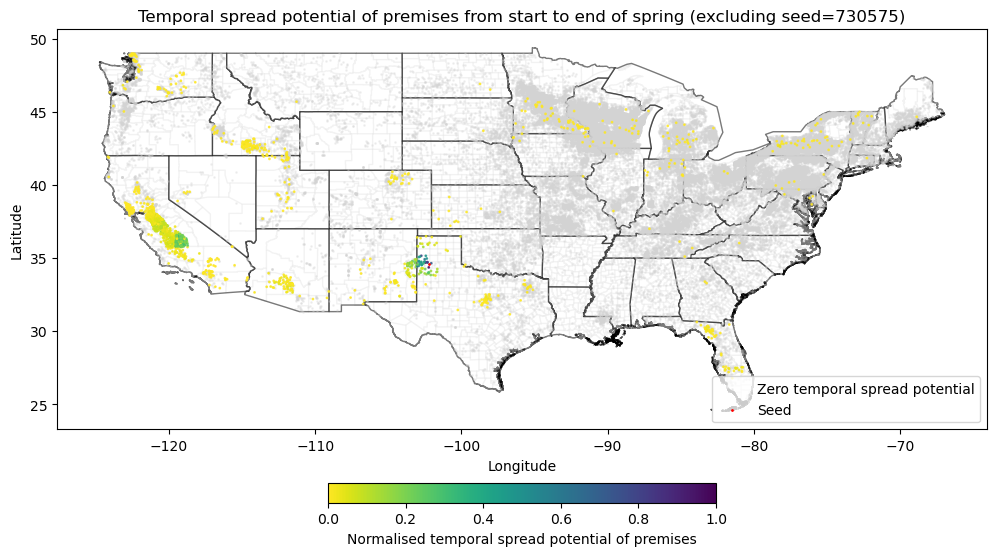

In [14]:
# Plot the shapefile
fig, ax = plt.subplots(figsize=(12, 7))
counties_sf.plot(ax=ax, color='white', edgecolor='grey', alpha = 0.1)
states_sf.plot(ax=ax, color='white', edgecolor='black', alpha = 0.5)

# Plot the points with sizes proportional to the risk
# Plot the nodes with risk 0 as black points
premises_with_spread_0.plot(ax=ax, color='lightgrey', markersize=1, alpha=0.25, label='Zero temporal spread potential')
# Plot the nodes with risk > 0 using the OrRd colormap
premises_with_spread_nonzero.plot(ax=ax, column = 'normalized_spread', cmap = 'viridis_r', markersize= 1, alpha=0.8)
plot_gdf_source.plot(ax=ax, color='red', markersize= 1, alpha= 1, label = 'Seed')
# Add a colorbar to represent the risk values
sm = plt.cm.ScalarMappable(cmap='viridis_r')
sm.set_array([])  

# Add the colorbar to the figure
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1)
cbar.set_label('Normalised temporal spread potential of premises')

#fig.tight_layout()
# Customize and show the plot
plt.title(plot_title)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='lower right') 
plt.savefig(fig_path, dpi = 600)